# Project description
 
### you've been offered an internship in the analytical department at Yandex.Afisha. Your first task is to help optimize marketing expenses.

#### You have:  
#####                   Server logs with data on Yandex.Afisha visits from June 2017 through May 2018.
                
#####                    Dump file with all orders for the period.

#####                    Marketing expenses statistics.

## loading the data and necessary libraries

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
try:
    orders = pd.read_csv('orders_log_us.csv',parse_dates=['Buy Ts'])
    costs = pd.read_csv('costs_us.csv',parse_dates=['dt'])
    visits=pd.read_csv('visits_log_us.csv',dtype={'Device':'category'},parse_dates=['End Ts','Start Ts'])
except:
    orders = pd.read_csv('/datasets/orders_log_us.csv',parse_dates=['Buy Ts'])
    costs = pd.read_csv('/datasets/costs_us.csv',parse_dates=['dt'])
    visits=pd.read_csv('/datasets/visits_log_us.csv',dtype={'Device':'category'},parse_dates=['End Ts','Start Ts'])

In [3]:
def overview(df):
    print()
    print(df.head())
    print()
    df.info()
    print()
    print("the num of duplicated rows is:",df.duplicated().sum())
    print('_______________________________')
    print()

In [4]:
df_list = [orders,costs,visits]

for df in df_list:
    overview(df) 


               Buy Ts  Revenue                   Uid
0 2017-06-01 00:10:00    17.00  10329302124590727494
1 2017-06-01 00:25:00     0.55  11627257723692907447
2 2017-06-01 00:27:00     0.37  17903680561304213844
3 2017-06-01 00:29:00     0.55  16109239769442553005
4 2017-06-01 07:58:00     0.37  14200605875248379450

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB

the num of duplicated rows is: 0
_______________________________


   source_id         dt  costs
0          1 2017-06-01  75.20
1          1 2017-06-02  62.25
2          1 2017-06-03  36.53
3          1 2017-06-04  55.00
4          1 2017-06-05  57.08

<class 'pandas.core.fr

We will make some adjustments to the data sets so that we can perform an analysis properly.

In [5]:
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])
visits['End Ts'] = pd.to_datetime(visits['End Ts'])

visits['date'] = visits['Start Ts'].astype('datetime64[D]')

visits['week'] = visits['Start Ts'].astype('datetime64[W]')
visits['month'] = visits['Start Ts'].astype('datetime64[M]')
visits=visits.sort_values(by='date')
visits.head()

Device              End Ts  Source Id            Start Ts  \
160503    touch 2017-06-01 20:56:00          3 2017-06-01 20:53:00   
155377  desktop 2017-06-01 16:58:00          3 2017-06-01 16:55:00   
205277  desktop 2017-06-01 10:48:00          4 2017-06-01 10:48:00   
171287    touch 2017-06-01 06:51:00          4 2017-06-01 06:48:00   
123821  desktop 2017-06-01 11:04:00          5 2017-06-01 10:55:00   

                        Uid       date       week      month  
160503  7375900667698214317 2017-06-01 2017-06-01 2017-06-01  
155377  2878167803923672055 2017-06-01 2017-06-01 2017-06-01  
205277  2158078625570681342 2017-06-01 2017-06-01 2017-06-01  
171287  7948308269379886129 2017-06-01 2017-06-01 2017-06-01  
123821  4649929171763482581 2017-06-01 2017-06-01 2017-06-01

-  **How many people use it every day, week, and month?**


Let's answer this through the measures of DAU/WAU/MAU

## DAU

In [6]:
dau=visits.groupby(['date'])['Uid'].nunique().reset_index()
dau['Uid'].sum()

330509

In [7]:
dau['Uid'].mean()

907.9917582417582

In [8]:
dau.head()

date  Uid
0 2017-06-01  605
1 2017-06-02  608
2 2017-06-03  445
3 2017-06-04  476
4 2017-06-05  820

In [9]:
fig = px.line(dau,x="date", y="Uid",title='DAU')
#adding reference line with average DAU over time
fig.add_hline(y=dau['Uid'].mean(),line_dash="dash", line_color="purple", annotation_text="average DAU",
             annotation_position="top left")
fig.show()

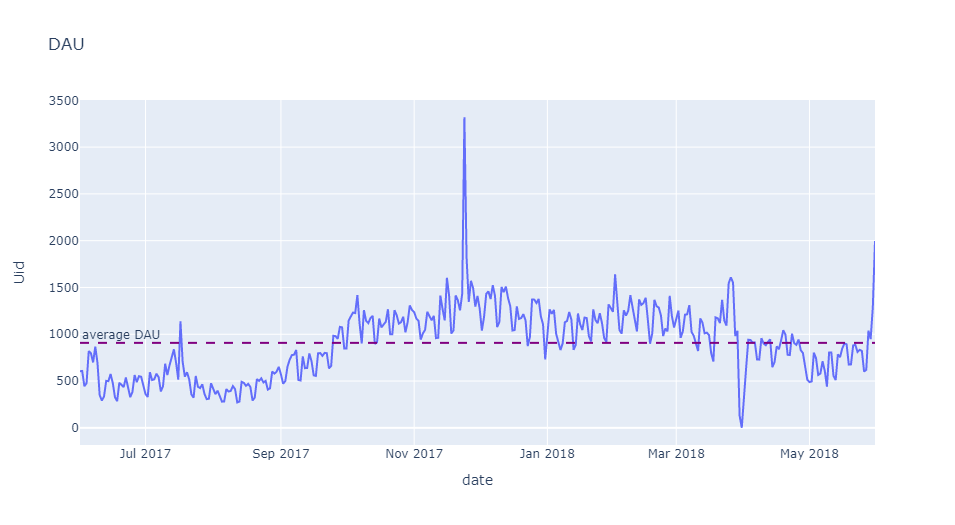

The month of November is the star of purchases. But we are not surprised because this month is known for end-of-stock sales that take place all over the world.

## WAU

In [10]:
wau=visits.groupby(visits['week'])['Uid'].nunique().reset_index()
wau['Uid'].sum()

303394

In [11]:
wau['Uid'].mean()

5724.415094339623

In [12]:
fig = go.Figure(layout=go.Layout(
        title=go.layout.Title(text="wau")))
fig.add_trace(go.Scatter(x=wau['week'], 
                        y=wau['Uid'],
                    mode='lines+markers',
                    name='lines+markers',line = dict(color='purple', width=5)))
#adding reference line with average DAU over time
fig.add_hline(y=wau['Uid'].mean(),line_dash="dash", line_color="red", annotation_text="average WAU",
             annotation_position="top left")
fig.show()

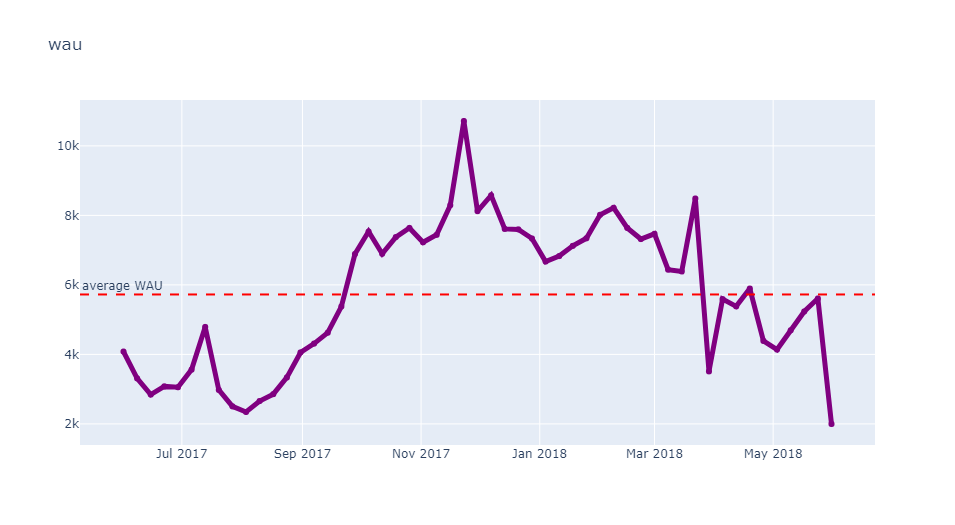

Here you can dive deeper. Although we still see that the month of November is the most prominent, we see that there is a significant decrease in the summer months. In addition, after the crazy increase in November, a significant decrease below the average begins from March 22 until the end of the period.


## MAU

In [13]:
mau=visits.groupby(visits['month'])['Uid'].nunique().reset_index()
mau['Uid'].sum()

278741

In [14]:
mau['Uid'].mean()

23228.416666666668

In [15]:
fig = go.Figure(layout=go.Layout(
        title=go.layout.Title(text="MAU")))
fig.add_trace(go.Scatter(x=mau['month'], 
                        y=mau['Uid'],
                    mode='lines+markers',
                    name='lines+markers',line = dict(color='purple', width=5)))
#adding reference line with average DAU over time
fig.add_hline(y=mau['Uid'].mean(),line_dash="dash", line_color="red", annotation_text="average MAU",
             annotation_position="top left")
fig.show()

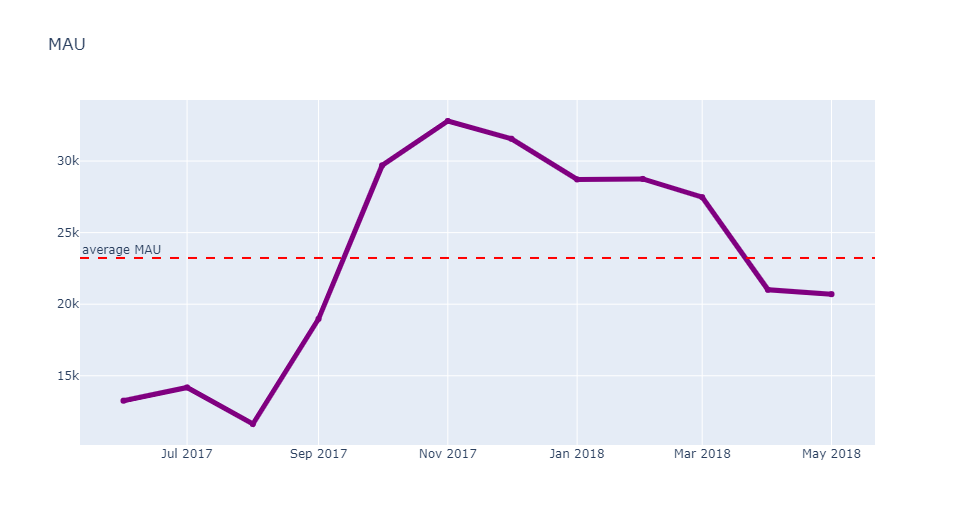

In my opinion, the most effective and useful index here in our case is WAU, you can clearly see the contrasting changes that occur in one month. In addition, since the graph is interactive, you can drag the arrow and go down even further in resolutions.

- **How many sessions are there per day? (One user might have more than one session.)**


In [16]:
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])

orders['date'] = orders['Buy Ts'].astype('datetime64[D]')

orders['week'] = orders['Buy Ts'].astype('datetime64[W]')
orders['month'] = orders['Buy Ts'].astype('datetime64[M]')
orders=orders.sort_values(by='date')
orders.head()

Buy Ts  Revenue                   Uid       date       week  \
0  2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 2017-06-01   
69 2017-06-01 21:19:00     3.67  13596221371441143698 2017-06-01 2017-06-01   
68 2017-06-01 21:14:00     3.05   8655045207590755923 2017-06-01 2017-06-01   
67 2017-06-01 21:12:00     0.98  18124631666135248287 2017-06-01 2017-06-01   
66 2017-06-01 21:09:00     2.44   9729244501093943694 2017-06-01 2017-06-01   

        month  
0  2017-06-01  
69 2017-06-01  
68 2017-06-01  
67 2017-06-01  
66 2017-06-01

In [17]:
spd=visits.groupby('date')['Uid'].count().reset_index()
spd.head()

date  Uid
0 2017-06-01  664
1 2017-06-02  658
2 2017-06-03  477
3 2017-06-04  510
4 2017-06-05  893

In [18]:
spd['Uid'].mean()

987.3626373626373

In [19]:
fig = go.Figure(layout=go.Layout(
        title=go.layout.Title(text="SPD")))
fig.add_trace(go.Scatter(x=spd['date'], 
                        y=spd['Uid'],
                    mode='lines+markers',
                    name='lines+markers',line = dict(color='purple', width=5)))
#adding reference line with average DAU over time
fig.add_hline(y=spd['Uid'].mean(),line_dash="dash", line_color="red", annotation_text="average SPD",
             annotation_position="top left")
fig.show()

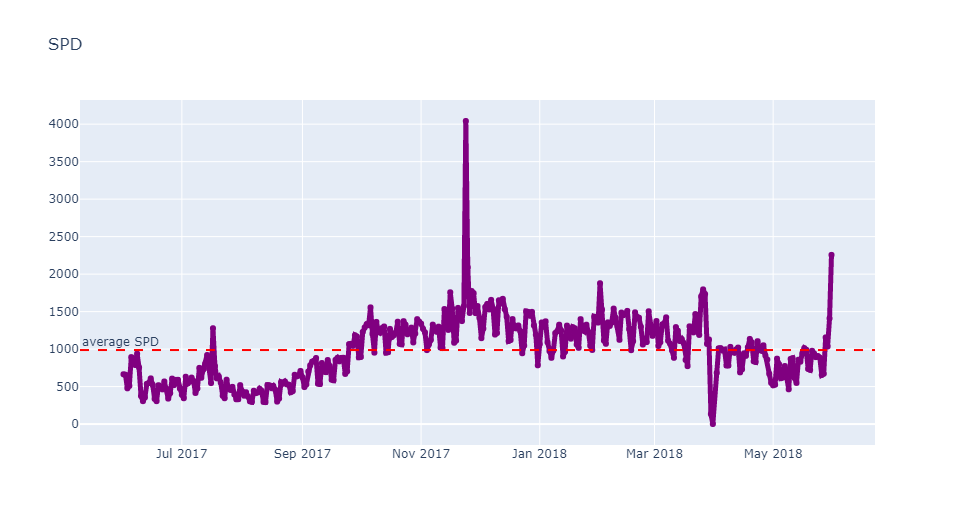

You can see that there is a match between the number of users and the number of sessions. We see that even here in the month of November the graph rises significantly. Does that mean our conversion rates are high?

- **What is the length of each session?**


In [20]:
visits['duration_of_session']=(visits['End Ts']-visits['Start Ts']).dt.total_seconds()
visits.head()

Device              End Ts  Source Id            Start Ts  \
160503    touch 2017-06-01 20:56:00          3 2017-06-01 20:53:00   
155377  desktop 2017-06-01 16:58:00          3 2017-06-01 16:55:00   
205277  desktop 2017-06-01 10:48:00          4 2017-06-01 10:48:00   
171287    touch 2017-06-01 06:51:00          4 2017-06-01 06:48:00   
123821  desktop 2017-06-01 11:04:00          5 2017-06-01 10:55:00   

                        Uid       date       week      month  \
160503  7375900667698214317 2017-06-01 2017-06-01 2017-06-01   
155377  2878167803923672055 2017-06-01 2017-06-01 2017-06-01   
205277  2158078625570681342 2017-06-01 2017-06-01 2017-06-01   
171287  7948308269379886129 2017-06-01 2017-06-01 2017-06-01   
123821  4649929171763482581 2017-06-01 2017-06-01 2017-06-01   

        duration_of_session  
160503                180.0  
155377                180.0  
205277                  0.0  
171287                180.0  
123821                540.0

In [21]:
visits['duration_of_session'].mean()

643.0256872565387

In [22]:
(visits['End Ts']-visits['Start Ts']).dt.total_seconds().describe()

count    359400.000000
mean        643.025687
std         997.127761
min       -2760.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       42660.000000
dtype: float64

In [ ]:
fig = go.Figure(layout=go.Layout(
        title=go.layout.Title(text="duration_of_session")))
fig.add_trace(go.Scatter(x=visits['date'], 
                        y=visits['duration_of_session'],
                    mode='lines+markers',
                    name='lines+markers',line = dict(color='purple', width=5)))
#adding reference line with average DAU over time
fig.add_hline(y=visits['duration_of_session'].mean(),line_dash="dash", line_color="red", annotation_text="average duration_of_session",
             annotation_position="top left")
fig.show()

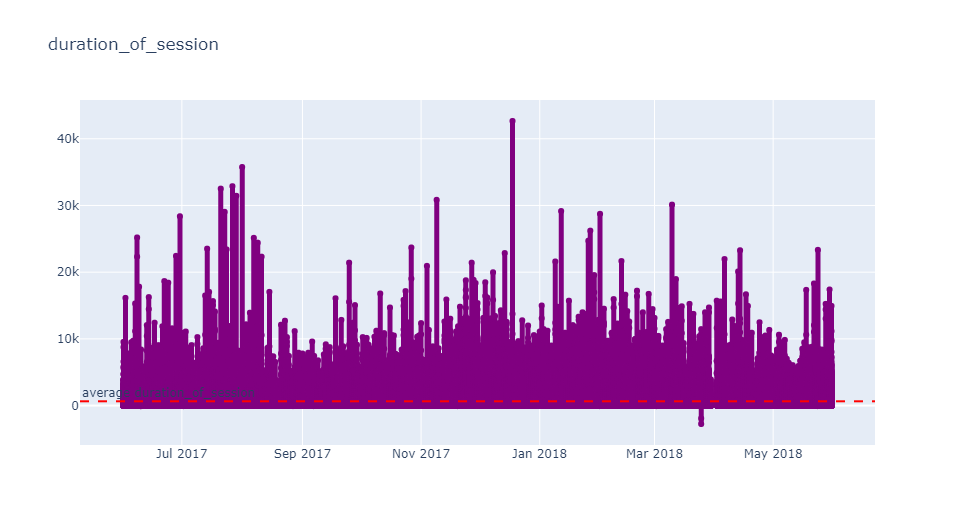

Here I was surprised. Contrary to intuition which says that the duration of the sessions will be according to the number of users at that time, but I came to know here that it is not. Unlike the previous graphs. The month of November is not the highest here, precisely on December 19 there is an increase and then a bigger increase on March 25.

## Retention

- **How often do users come back?**

<b>Retention shows us how many users (in % out of registered) were active (had sessions) on a certain day/week/month after registratiion/first visit. Basically, for retention we need to find the differnce between any session and first session<b>
    


In [24]:
#let's find the first session for each user
min_visits=visits.groupby(['Uid'])['month'].min().reset_index()
min_visits.columns = ['Uid','first_session']
min_visits.head()


Uid first_session
0   11863502262781    2018-03-01
1   49537067089222    2018-02-01
2  297729379853735    2017-06-01
3  313578113262317    2017-09-01
4  325320750514679    2017-09-01

In [25]:
visits=visits.merge(min_visits,how='inner',on=['Uid'])
visits.head()

Device              End Ts  Source Id            Start Ts  \
0    touch 2017-06-01 20:56:00          3 2017-06-01 20:53:00   
1  desktop 2017-06-01 16:58:00          3 2017-06-01 16:55:00   
2    touch 2017-11-16 19:40:00          3 2017-11-16 19:39:00   
3  desktop 2017-06-01 10:48:00          4 2017-06-01 10:48:00   
4    touch 2017-06-01 06:51:00          4 2017-06-01 06:48:00   

                   Uid       date       week      month  duration_of_session  \
0  7375900667698214317 2017-06-01 2017-06-01 2017-06-01                180.0   
1  2878167803923672055 2017-06-01 2017-06-01 2017-06-01                180.0   
2  2878167803923672055 2017-11-16 2017-11-16 2017-11-01                 60.0   
3  2158078625570681342 2017-06-01 2017-06-01 2017-06-01                  0.0   
4  7948308269379886129 2017-06-01 2017-06-01 2017-06-01                180.0   

  first_session  
0    2017-06-01  
1    2017-06-01  
2    2017-06-01  
3    2017-06-01  
4    2017-06-01

In [26]:
visits['cohort']=visits['first_session'].astype('datetime64[M]')
visits['visit_month']= visits['Start Ts'].astype('datetime64[M]')
visits['age']= ((visits['visit_month'] - visits['cohort']) / np.timedelta64(1, 'M')).round().astype(int)
visits.head()

Device              End Ts  Source Id            Start Ts  \
0    touch 2017-06-01 20:56:00          3 2017-06-01 20:53:00   
1  desktop 2017-06-01 16:58:00          3 2017-06-01 16:55:00   
2    touch 2017-11-16 19:40:00          3 2017-11-16 19:39:00   
3  desktop 2017-06-01 10:48:00          4 2017-06-01 10:48:00   
4    touch 2017-06-01 06:51:00          4 2017-06-01 06:48:00   

                   Uid       date       week      month  duration_of_session  \
0  7375900667698214317 2017-06-01 2017-06-01 2017-06-01                180.0   
1  2878167803923672055 2017-06-01 2017-06-01 2017-06-01                180.0   
2  2878167803923672055 2017-11-16 2017-11-16 2017-11-01                 60.0   
3  2158078625570681342 2017-06-01 2017-06-01 2017-06-01                  0.0   
4  7948308269379886129 2017-06-01 2017-06-01 2017-06-01                180.0   

  first_session     cohort visit_month  age  
0    2017-06-01 2017-06-01  2017-06-01    0  
1    2017-06-01 2017-06-01  2017-06-01    0  
2    2017-06-01 2017-06-01  2017-11-01    5  
3    2017-06-01 2017-06-01  2017-06-01    0  
4    2017-06-01 2017-06-01  2017-06-01    0

In [27]:
visits.age.max()

11

If we want to compare users behavior from different cohorts after certain period of time, we can use pivot_table for that

In [28]:
cohorts=visits.pivot_table(index='cohort',
                           columns='age',
                           values='Uid',
                           aggfunc='nunique').fillna(0)

cohorts

age              0       1       2       3      4      5      6      7   \
cohort                                                                    
2017-06-01  13259.0  1043.0   713.0   814.0  909.0  947.0  809.0  766.0   
2017-07-01  13140.0   737.0   674.0   738.0  765.0  633.0  596.0  601.0   
2017-08-01  10181.0   783.0   640.0   639.0  510.0  448.0  370.0  402.0   
2017-09-01  16704.0  1428.0  1156.0   847.0  658.0  632.0  599.0  404.0   
2017-10-01  25977.0  2042.0  1357.0  1012.0  890.0  837.0  555.0  529.0   
2017-11-01  27248.0  2133.0  1202.0  1054.0  919.0  638.0  594.0    0.0   
2017-12-01  25268.0  1410.0   960.0   786.0  512.0  481.0    0.0    0.0   
2018-01-01  22624.0  1351.0   890.0   565.0  458.0    0.0    0.0    0.0   
2018-02-01  22197.0  1267.0   565.0   446.0    0.0    0.0    0.0    0.0   
2018-03-01  20589.0   861.0   557.0     0.0    0.0    0.0    0.0    0.0   
2018-04-01  15709.0   760.0     0.0     0.0    0.0    0.0    0.0    0.0   
2018-05-01  15273.0     0.0     0.0     0.0    0.0    0.0    0.0    0.0   

age            8      9      10     11  
cohort                                  
2017-06-01  694.0  674.0  539.0  596.0  
2017-07-01  510.0  376.0  361.0    0.0  
2017-08-01  284.0  265.0    0.0    0.0  
2017-09-01  381.0    0.0    0.0    0.0  
2017-10-01    0.0    0.0    0.0    0.0  
2017-11-01    0.0    0.0    0.0    0.0  
2017-12-01    0.0    0.0    0.0    0.0  
2018-01-01    0.0    0.0    0.0    0.0  
2018-02-01    0.0    0.0    0.0    0.0  
2018-03-01    0.0    0.0    0.0    0.0  
2018-04-01    0.0    0.0    0.0    0.0  
2018-05-01    0.0    0.0    0.0    0.0

#### keep in mind that retention is a % of those who returned from those who registered. Column age=0 includes all of the users that registered in a cohort, thus, to calculate Retention in % we divide columns for all ages by column when age=0

In [29]:
retention=cohorts.iloc[:,0:].div(cohorts[0], axis=0)
retention

age          0         1         2         3         4         5         6   \
cohort                                                                        
2017-06-01  1.0  0.078664  0.053775  0.061392  0.068557  0.071423  0.061015   
2017-07-01  1.0  0.056088  0.051294  0.056164  0.058219  0.048174  0.045358   
2017-08-01  1.0  0.076908  0.062862  0.062764  0.050093  0.044004  0.036342   
2017-09-01  1.0  0.085489  0.069205  0.050706  0.039392  0.037835  0.035860   
2017-10-01  1.0  0.078608  0.052239  0.038958  0.034261  0.032221  0.021365   
2017-11-01  1.0  0.078281  0.044113  0.038682  0.033727  0.023415  0.021800   
2017-12-01  1.0  0.055802  0.037993  0.031107  0.020263  0.019036  0.000000   
2018-01-01  1.0  0.059715  0.039339  0.024973  0.020244  0.000000  0.000000   
2018-02-01  1.0  0.057080  0.025454  0.020093  0.000000  0.000000  0.000000   
2018-03-01  1.0  0.041818  0.027053  0.000000  0.000000  0.000000  0.000000   
2018-04-01  1.0  0.048380  0.000000  0.000000  0.000000  0.000000  0.000000   
2018-05-01  1.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

age               7         8         9         10        11  
cohort                                                        
2017-06-01  0.057772  0.052342  0.050833  0.040652  0.044951  
2017-07-01  0.045738  0.038813  0.028615  0.027473  0.000000  
2017-08-01  0.039485  0.027895  0.026029  0.000000  0.000000  
2017-09-01  0.024186  0.022809  0.000000  0.000000  0.000000  
2017-10-01  0.020364  0.000000  0.000000  0.000000  0.000000  
2017-11-01  0.000000  0.000000  0.000000  0.000000  0.000000  
2017-12-01  0.000000  0.000000  0.000000  0.000000  0.000000  
2018-01-01  0.000000  0.000000  0.000000  0.000000  0.000000  
2018-02-01  0.000000  0.000000  0.000000  0.000000  0.000000  
2018-03-01  0.000000  0.000000  0.000000  0.000000  0.000000  
2018-04-01  0.000000  0.000000  0.000000  0.000000  0.000000  
2018-05-01  0.000000  0.000000  0.000000  0.000000  0.000000

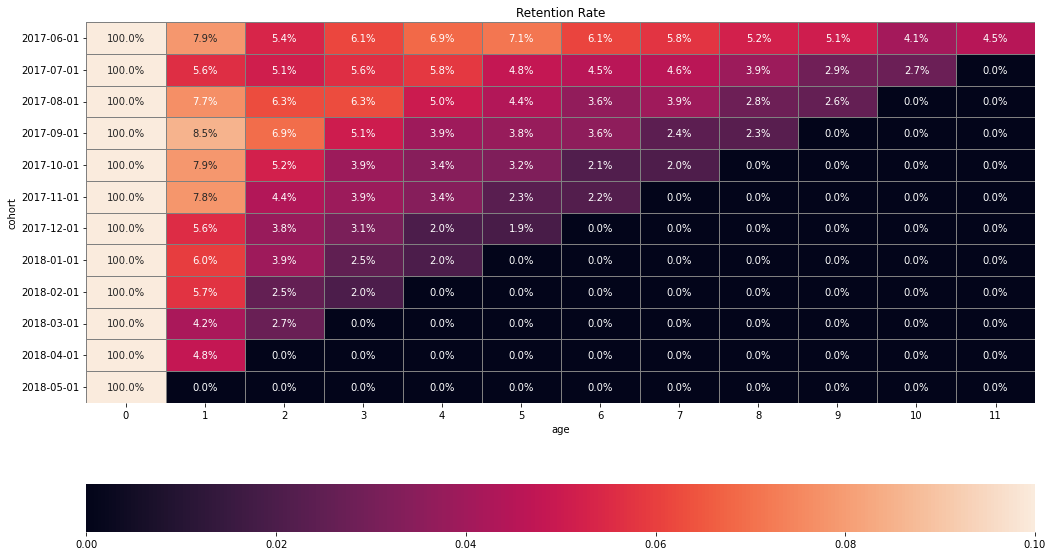

In [30]:
# the first line just formats cohort into a str for a nicer output
retention.index=retention.index.astype(str)
fig,ax=plt.subplots(figsize=(17,10))
sns.heatmap(retention, annot=True,fmt='.1%', linewidths=1, linecolor='grey', vmax=0.1, cbar_kws={'orientation':'horizontal'}).set(title='Retention Rate')
plt.show()

after few first months there is a drastic decrease.

# sales

### When do people start buying? 

So we're talking about Conversion here. Conversion depicts how long does it take from first visit to the purchase in days. So for each user you need to find the date of first visit and the date of first order. For that we will create a small separate datasets with purchases

In [31]:
first_order=orders.groupby('Uid')['date'].min().reset_index()
first_order.columns=['Uid','first_order']
first_order.head()

Uid first_order
0   313578113262317  2018-01-03
1  1575281904278712  2017-06-03
2  2429014661409475  2017-10-11
3  2464366381792757  2018-01-28
4  2551852515556206  2017-11-24

In [32]:
orders=orders.merge(min_visits,how='inner',on='Uid')
orders=orders.merge(first_order,how='inner',on='Uid')
orders.head()

Buy Ts  Revenue                   Uid       date       week  \
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 2017-06-01   
1 2017-06-01 21:19:00     3.67  13596221371441143698 2017-06-01 2017-06-01   
2 2017-09-28 11:49:00     2.62  13596221371441143698 2017-09-28 2017-09-28   
3 2017-10-31 02:16:00     2.75  13596221371441143698 2017-10-31 2017-10-26   
4 2017-11-09 20:30:00     2.00  13596221371441143698 2017-11-09 2017-11-09   

       month first_session first_order  
0 2017-06-01    2017-06-01  2017-06-01  
1 2017-06-01    2017-06-01  2017-06-01  
2 2017-09-01    2017-06-01  2017-06-01  
3 2017-10-01    2017-06-01  2017-06-01  
4 2017-11-01    2017-06-01  2017-06-01

In [33]:
orders['conversion']=((pd.to_datetime(orders['Buy Ts'])-pd.to_datetime(orders['first_session']))/np.timedelta64(1,'D')).astype('int')
orders.tail()

Buy Ts  Revenue                   Uid       date  \
50410 2018-05-31 11:12:00    11.00  16450490992224379716 2018-05-31   
50411 2018-05-31 11:12:00     1.16   1380153665366923036 2018-05-31   
50412 2018-05-31 11:13:00     4.40   3269929539807643057 2018-05-31   
50413 2018-05-31 11:14:00     5.50   5144503245886040221 2018-05-31   
50414 2018-06-01 00:02:00     3.42     83872787173869366 2018-06-01   

            week      month first_session first_order  conversion  
50410 2018-05-31 2018-05-01    2018-05-01  2018-05-31          30  
50411 2018-05-31 2018-05-01    2018-05-01  2018-05-31          30  
50412 2018-05-31 2018-05-01    2018-04-01  2018-05-31          60  
50413 2018-05-31 2018-05-01    2018-05-01  2018-05-31          30  
50414 2018-05-31 2018-06-01    2018-05-01  2018-06-01          31

In [34]:
fig = px.histogram(orders, x="conversion",nbins=30,title='Conversion')
fig.show()

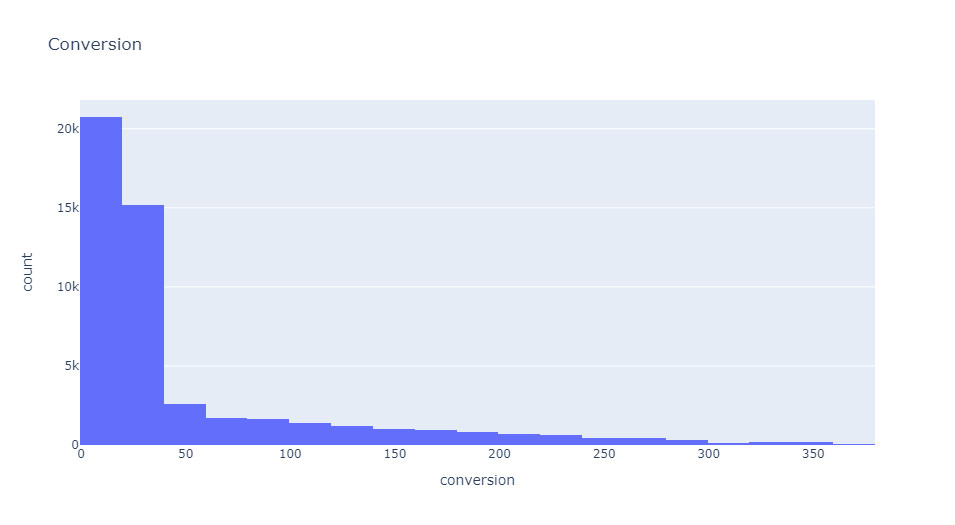

Our conversion rates are getting smaller and smaller. From the data and the graph it can be concluded that there are probably users who fall asleep over time and there are some who hardly ever. The standard deviation is about three times the mean. Where does the big change among customers come from? Maybe these are the customers we call the "sticky factor" or maybe it depends on the sources.

In [35]:
print('the overal conversion is {:.1%}'.format(orders['Uid'].nunique()/visits['Uid'].nunique()))

the overal conversion is 16.0%


- **How many orders do they make during a given period of time?**

Let's also use the concept of cohort analysis here, just do it for purchases per user.  Remember how we defined cohort in retention as first session? From now on we will work with **first purhase** as the cohort, since we care about reoccuring purchases, not visits. Further on in LTV, CAC and ROMI calculations we will also use only info on buyers, since we care about the returns and costs on buyers.

In [36]:
orders['first_order_month']=orders['first_order'].astype('datetime64[M]')
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50415 entries, 0 to 50414
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Buy Ts             50415 non-null  datetime64[ns]
 1   Revenue            50415 non-null  float64       
 2   Uid                50415 non-null  uint64        
 3   date               50415 non-null  datetime64[ns]
 4   week               50415 non-null  datetime64[ns]
 5   month              50415 non-null  datetime64[ns]
 6   first_session      50415 non-null  datetime64[ns]
 7   first_order        50415 non-null  datetime64[ns]
 8   conversion         50415 non-null  int32         
 9   first_order_month  50415 non-null  datetime64[ns]
dtypes: datetime64[ns](7), float64(1), int32(1), uint64(1)
memory usage: 4.0 MB


Keep in mind, that first_order_month now defines our cohort) Now let's aggregate the data : for each cohort we will find the month of purchase (then age from that), the number of purchases and unique customers. Will then calculate orders_per_buyer for each cohort and each month

In [37]:
#let's define cohort size. this is one of the most important aggregation that we will use in cohort analysis
#using the month of first purchase we will define which cohort our buyers belongs to
cohort_sizes = orders.groupby('first_order_month').agg({'Uid': 'nunique'}).reset_index()
cohort_sizes.columns=['first_order_month','cohort_size']
cohort_sizes.head()

first_order_month  cohort_size
0        2017-06-01         2023
1        2017-07-01         1923
2        2017-08-01         1370
3        2017-09-01         2581
4        2017-10-01         4340

In [38]:
#calculating number of purchases for cohort and month
cohort=orders.groupby(['first_order_month','month'])['Revenue'].count().reset_index()
cohort.columns=['first_order_month','month','orders']
cohort.head()

first_order_month      month  orders
0        2017-06-01 2017-06-01    2354
1        2017-06-01 2017-07-01     177
2        2017-06-01 2017-08-01     174
3        2017-06-01 2017-09-01     226
4        2017-06-01 2017-10-01     292

In [39]:
cohort=cohort.merge(cohort_sizes,on=['first_order_month'])
cohort['age_month'] = ((cohort['month'] - cohort['first_order_month']) / np.timedelta64(1,'M')).round()
cohort['orders_per_buyer']=cohort['orders']/cohort['cohort_size']



Using pivot tables as before to do cohort analysis on orders_per_buyer

In [40]:
cohort_piv=cohort.pivot_table(
    index='first_order_month', 
    columns='age_month', 
    values='orders_per_buyer', 
    aggfunc='sum'
).cumsum(axis=1)

cohort_piv.round(2).fillna('')

age_month          0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   \
first_order_month                                                               
2017-06-01         1.16  1.25  1.34  1.45  1.59   1.7  1.84  1.92  2.03   2.1   
2017-07-01         1.14  1.19  1.25  1.31  1.34  1.39  1.42  1.44  1.47  1.49   
2017-08-01         1.12   1.2  1.27  1.33  1.39  1.44  1.47  1.53  1.56   1.6   
2017-09-01         1.14  1.22  1.28  1.35  1.37  1.42  1.46  1.48   1.5         
2017-10-01         1.14  1.22  1.25  1.28  1.31  1.34  1.35  1.38               
2017-11-01         1.18  1.28  1.32  1.37  1.41  1.42  1.45                     
2017-12-01         1.15  1.21  1.26   1.3  1.32  1.34                           
2018-01-01         1.12  1.19  1.24  1.25  1.28                                 
2018-02-01         1.12  1.18  1.21  1.22                                       
2018-03-01         1.17  1.22  1.27                                             
2018-04-01         1.10  1.18                                                   
2018-05-01         1.09                                                         
2018-06-01         1.00                                                         

age_month          10.0  11.0  
first_order_month              
2017-06-01         2.15  2.19  
2017-07-01         1.51        
2017-08-01                     
2017-09-01                     
2017-10-01                     
2017-11-01                     
2017-12-01                     
2018-01-01                     
2018-02-01                     
2018-03-01                     
2018-04-01                     
2018-05-01                     
2018-06-01

####  What is the average purchase size?


Here is the same logic, just instead of orders per user we're using average check.

In [41]:
avg_purchase_size = orders.groupby(['Buy Ts','Uid'])['Revenue'].mean().reset_index()
fig = px.histogram(avg_purchase_size,x='Revenue')
fig.show()

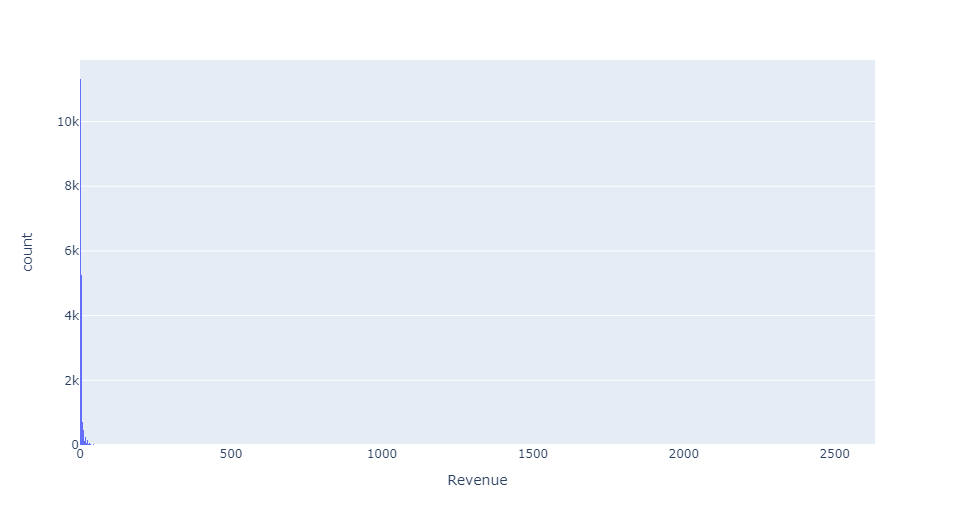

In [42]:
avg_purchase_size['Revenue'].mean()

4.999646930476993

lets try make the plot more clear by slicing the data.

In [43]:
avg_purchase_slice=avg_purchase_size[avg_purchase_size['Revenue']<30]
fig = px.histogram(avg_purchase_slice,x='Revenue')
fig.show()

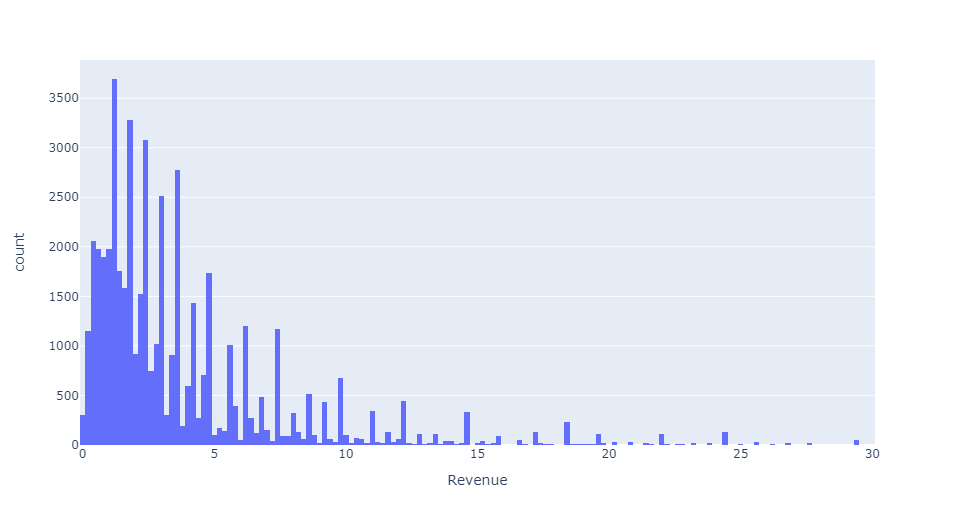

Most orders are low except for exceptions.

cohort analysis for avg purchase size.

In [44]:
avg_cohort=orders.groupby(['first_order_month','month'])['Revenue'].mean().reset_index()
avg_cohort['age_month']=((avg_cohort['month'] - avg_cohort['first_order_month']) / np.timedelta64(1,'M')).round()
avg_cohort.head()

first_order_month      month   Revenue  age_month
0        2017-06-01 2017-06-01  4.060106        0.0
1        2017-06-01 2017-07-01  5.547006        1.0
2        2017-06-01 2017-08-01  5.088161        2.0
3        2017-06-01 2017-09-01  8.545575        3.0
4        2017-06-01 2017-10-01  7.084178        4.0

In [45]:
avg_cohort_piv=avg_cohort.pivot_table(index='first_order_month',
                                      columns='age_month',
                                      values='Revenue',
                                      aggfunc='mean')
avg_cohort_piv.round(2).fillna('')

age_month          0.0    1.0    2.0    3.0    4.0    5.0    6.0    7.0   \
first_order_month                                                          
2017-06-01         4.06   5.55   5.09   8.55   7.08   6.83   6.97   6.76   
2017-07-01         5.29   6.45   9.99   6.64   4.72   3.66   3.79   5.45   
2017-08-01         4.72   5.99   6.28   6.62   7.96   6.27   5.89   7.11   
2017-09-01         4.97  13.17   8.35  62.57  15.43  15.32  16.77  11.21   
2017-10-01         4.37   7.41   5.13   5.59    5.1   5.07   4.28   4.01   
2017-11-01         4.37    4.1   4.47   6.28   4.44   3.73    4.6          
2017-12-01         4.11   4.23  20.07  26.08  15.95  14.11                 
2018-01-01         3.69   4.44   6.45   7.52   2.71                        
2018-02-01         3.71   4.58   3.45   3.87                               
2018-03-01         4.14   5.97   6.33                                      
2018-04-01         4.25    6.2                                             
2018-05-01         4.29                                                    
2018-06-01         3.42                                                    

age_month          8.0    9.0    10.0  11.0  
first_order_month                            
2017-06-01         5.28   8.01  12.04  6.04  
2017-07-01         5.35  11.79   5.65        
2017-08-01          8.7    5.6               
2017-09-01         7.79                      
2017-10-01                                   
2017-11-01                                   
2017-12-01                                   
2018-01-01                                   
2018-02-01                                   
2018-03-01                                   
2018-04-01                                   
2018-05-01                                   
2018-06-01

-  **How much money do they bring? (LTV)**

In [46]:
#get the revenue per cohort in each month
ltv_cohort=orders.groupby(['first_order_month','month'])['Revenue'].sum().reset_index()
ltv_cohort.columns=['first_order_month','month','Revenue']

#merge with the cohort size
ltv_cohort=ltv_cohort.merge(cohort_sizes,on=['first_order_month'])
ltv_cohort['age']=((ltv_cohort['month']-ltv_cohort['first_order_month'])/np.timedelta64(1,'M')).round()
ltv_cohort['ltv']=ltv_cohort['Revenue']/ltv_cohort['cohort_size']
ltv_cohort.head()


first_order_month      month  Revenue  cohort_size  age       ltv
0        2017-06-01 2017-06-01  9557.49         2023  0.0  4.724414
1        2017-06-01 2017-07-01   981.82         2023  1.0  0.485329
2        2017-06-01 2017-08-01   885.34         2023  2.0  0.437637
3        2017-06-01 2017-09-01  1931.30         2023  3.0  0.954671
4        2017-06-01 2017-10-01  2068.58         2023  4.0  1.022531

In [47]:
ltv_cohort_piv=ltv_cohort.pivot_table(
                                      index='first_order_month',
                                    columns='age',
                                     values='ltv',
                                    aggfunc='sum').cumsum(axis=1)
ltv_cohort_piv.round(2).fillna('')

age                0.0   1.0   2.0    3.0    4.0    5.0    6.0    7.0    8.0   \
first_order_month                                                               
2017-06-01         4.72  5.21  5.65    6.6   7.62   8.36   9.31   9.89  10.45   
2017-07-01         6.01  6.35  6.97   7.33    7.5   7.66   7.78   7.92   8.08   
2017-08-01         5.28  5.75  6.21    6.6   7.09   7.38   7.59   7.99   8.28   
2017-09-01         5.64  6.76  7.28  11.26  11.66  12.31  13.01  13.25  13.44   
2017-10-01         5.00  5.54  5.73   5.89   6.04   6.16   6.24   6.36          
2017-11-01         5.15  5.55  5.75   6.08   6.23   6.28    6.4                 
2017-12-01         4.74   5.0  5.92   6.99    7.3   7.64                        
2018-01-01         4.14  4.43  4.73   4.88   4.94                               
2018-02-01         4.16  4.44  4.51   4.59                                      
2018-03-01         4.84  5.14  5.46                                             
2018-04-01         4.66  5.19                                                   
2018-05-01         4.66                                                         
2018-06-01         3.42                                                         

age                 9.0    10.0   11.0  
first_order_month                       
2017-06-01         11.05  11.62  11.88  
2017-07-01          8.23   8.39         
2017-08-01          8.47                
2017-09-01                              
2017-10-01                              
2017-11-01                              
2017-12-01                              
2018-01-01                              
2018-02-01                              
2018-03-01                              
2018-04-01                              
2018-05-01                              
2018-06-01

**Keep in mind that LTV is a cumulative metric, so we would use cumsum() here.**

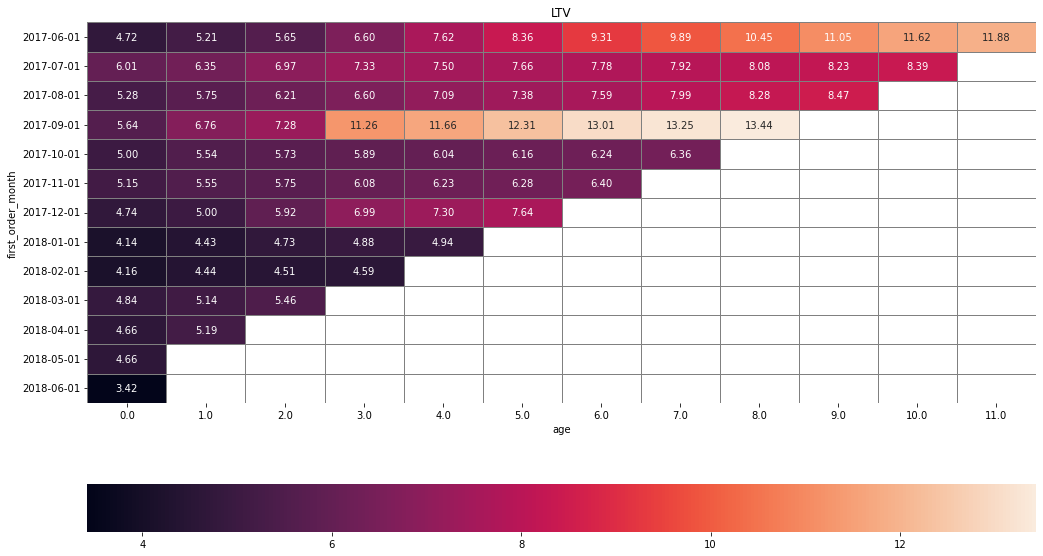

In [48]:
fig,ax=plt.subplots(figsize=(17,10))

ltv_cohort_piv.index=ltv_cohort_piv.index.astype(str)
sns.heatmap(ltv_cohort_piv, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws= {'orientation': 'horizontal'} 
            ).set(title ='LTV')
plt.show()

The September month, even after six months, keeps customers alive.

### 3.Marketing

- **How much money was spent? Overall/per source/over time**

In [49]:
costs_market=costs.groupby(['dt','source_id'])['costs'].sum().reset_index()
costs_market.sort_values(by=['dt','source_id']).head()

dt  source_id   costs
0 2017-06-01          1   75.20
1 2017-06-01          2  132.56
2 2017-06-01          3  349.38
3 2017-06-01          4   76.74
4 2017-06-01          5   73.24

In [50]:
print('the total marketing costs is {}'.format(costs_market['costs'].sum()))

the total marketing costs is 329131.62


lets see how its split across source

In [51]:
costs_market_source=costs_market.groupby('source_id')['costs'].sum().reset_index()
costs_market_source

source_id      costs
0          1   20833.27
1          2   42806.04
2          3  141321.63
3          4   61073.60
4          5   51757.10
5          9    5517.49
6         10    5822.49

In [52]:
fig = px.line(costs_market, x="dt", y="costs", color='source_id')
fig.show()

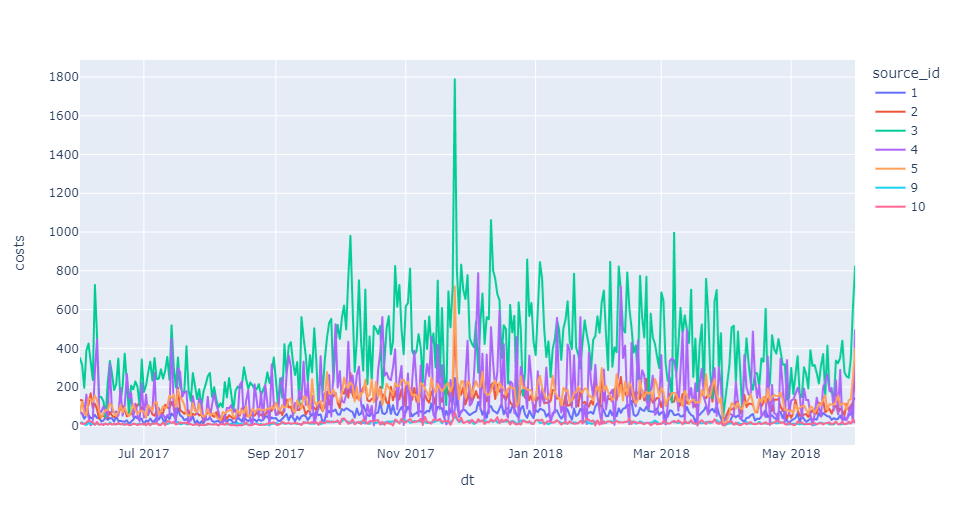

Source number 3 leads by a margin over all.

-  **How much did customer acquisition from each of the sources cost?**

For customer acquistion we will calculate it based on customers not visitors.Let's do it by month. We need to group costs and customers by month then.

In [53]:
costs['cost_month']=costs['dt'].astype('datetime64[M]')
costs_by_month=costs.groupby('cost_month')['costs'].sum().reset_index()
costs_by_month.head()

cost_month     costs
0 2017-06-01  18015.00
1 2017-07-01  18240.59
2 2017-08-01  14790.54
3 2017-09-01  24368.91
4 2017-10-01  36322.88

In [54]:
buyers_per_moth=orders.groupby(['first_order_month'])['Uid'].nunique().reset_index()
buyers_per_moth.columns=['cost_month','buyers']
buyers_per_moth.head()

cost_month  buyers
0 2017-06-01    2023
1 2017-07-01    1923
2 2017-08-01    1370
3 2017-09-01    2581
4 2017-10-01    4340

In [55]:
CAC_per_month=costs_by_month.merge(buyers_per_moth,how='left',on=['cost_month'])
CAC_per_month['CAC']=CAC_per_month['costs']/CAC_per_month['buyers']
CAC_per_month.head()

cost_month     costs  buyers        CAC
0 2017-06-01  18015.00    2023   8.905091
1 2017-07-01  18240.59    1923   9.485486
2 2017-08-01  14790.54    1370  10.796015
3 2017-09-01  24368.91    2581   9.441654
4 2017-10-01  36322.88    4340   8.369327

In [56]:
fig = px.line(CAC_per_month, x="cost_month", y="CAC", title='CAC')
fig.show()

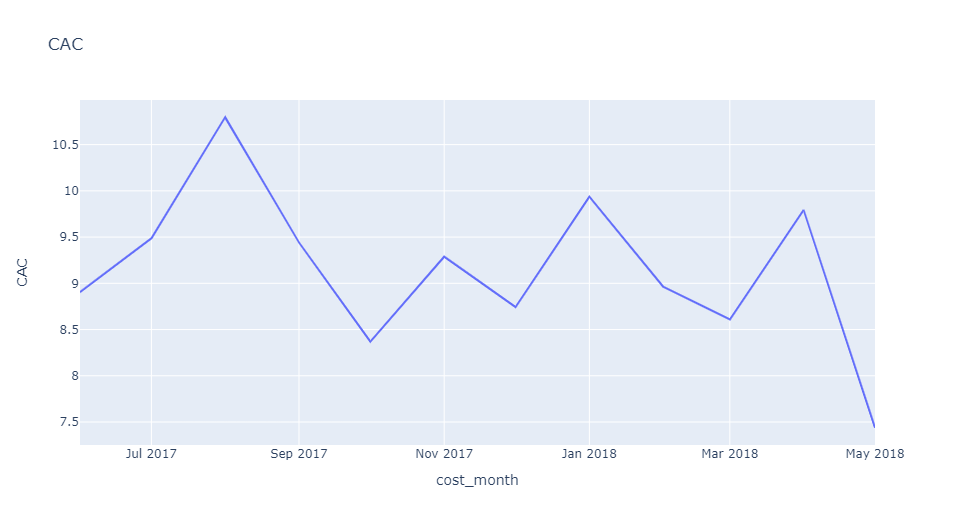

The June and September cohorts did very well. Perhaps because of the beginning of summer and the beginning of school. The rest, while getting closer to breaking even, have not managed to return their marketing costs.

**CAC per source**

In order to calculate CAC per source we need to know the original source of the user. If we check our original dataset we will see that users can come from different sources.

We look at orders table because even if the user didn't buy smth, he still came from the  first source.

In [57]:
visits.groupby('Uid')['Source Id'].nunique().head()

Uid
11863502262781     1
49537067089222     1
297729379853735    1
313578113262317    1
325320750514679    1
Name: Source Id, dtype: int64

Not all users have one source, let's define the first that they came from as the main source.

In [58]:
first_source=visits.sort_values('date').groupby('Uid').first()['Source Id'].reset_index()
first_source.columns=['Uid','first_source']
first_source.head()

Uid  first_source
0   11863502262781             3
1   49537067089222             2
2  297729379853735             3
3  313578113262317             2
4  325320750514679             5

Merge this data back to purchase becaue CAC calculations are based on buyers

In [59]:
orders=orders.merge(first_source,on=['Uid'],how='left')
orders.head()

Buy Ts  Revenue                   Uid       date       week  \
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 2017-06-01   
1 2017-06-01 21:19:00     3.67  13596221371441143698 2017-06-01 2017-06-01   
2 2017-09-28 11:49:00     2.62  13596221371441143698 2017-09-28 2017-09-28   
3 2017-10-31 02:16:00     2.75  13596221371441143698 2017-10-31 2017-10-26   
4 2017-11-09 20:30:00     2.00  13596221371441143698 2017-11-09 2017-11-09   

       month first_session first_order  conversion first_order_month  \
0 2017-06-01    2017-06-01  2017-06-01           0        2017-06-01   
1 2017-06-01    2017-06-01  2017-06-01           0        2017-06-01   
2 2017-09-01    2017-06-01  2017-06-01         119        2017-06-01   
3 2017-10-01    2017-06-01  2017-06-01         152        2017-06-01   
4 2017-11-01    2017-06-01  2017-06-01         161        2017-06-01   

   first_source  
0             1  
1             9  
2             9  
3             9  
4             9

Let's see how CAC was changing for each source across time :) Once you get the logic.

In [60]:
costs_by_month_source=costs.groupby(['cost_month','source_id'])['costs'].sum().reset_index()
costs_by_month_source.columns=['cost_month','source','costs']
costs_by_month_source.head()

cost_month  source    costs
0 2017-06-01       1  1125.61
1 2017-06-01       2  2427.38
2 2017-06-01       3  7731.65
3 2017-06-01       4  3514.80
4 2017-06-01       5  2616.12

In [61]:
buyers_per_moth_source=orders.groupby(['first_order_month','first_source'])['Uid'].nunique().reset_index()
buyers_per_moth_source.columns=['cost_month','source','buyers']
buyers_per_moth_source.head()

cost_month  source  buyers
0 2017-06-01       1     211
1 2017-06-01       2     240
2 2017-06-01       3     626
3 2017-06-01       4     400
4 2017-06-01       5     387

In [62]:
#actual cac calculations
CAC_per_month_source=costs_by_month_source.merge(buyers_per_moth_source,how='left',on=['cost_month','source'])
CAC_per_month_source['CAC']=CAC_per_month_source['costs']/CAC_per_month_source['buyers']
CAC_per_month_source.head()

cost_month  source    costs  buyers        CAC
0 2017-06-01       1  1125.61     211   5.334645
1 2017-06-01       2  2427.38     240  10.114083
2 2017-06-01       3  7731.65     626  12.350879
3 2017-06-01       4  3514.80     400   8.787000
4 2017-06-01       5  2616.12     387   6.760000

In [63]:
fig = px.line(CAC_per_month_source, x="cost_month", y="CAC",color='source',title='CAC')
fig.show()

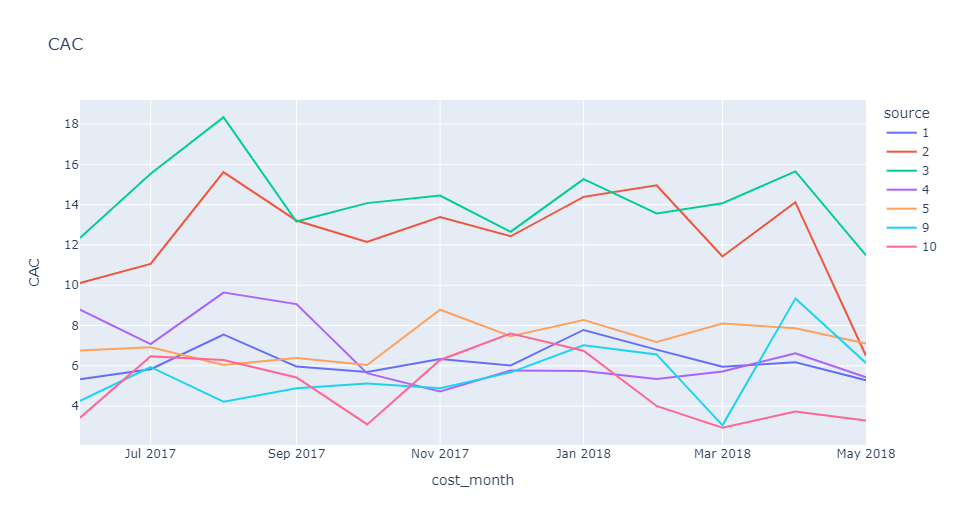

 Sources 1 and 9 have the highest return on marketing investment. Source 3 isn't even breaking even.

Additional advice: calculate overall average CAC per source and compare it how it was changing over time.

Let's do two version together: ROI per cohort and per source

We will start with ROI per cohort.  <div>
**In genereal, ROI=LTV/CAC**
    <div>
We already have calculations on CAC per month and we have info on ltv in ltv_cohort. So let's merge and work it out!

In [64]:
CAC_per_month_ROI=CAC_per_month[['cost_month','CAC']]
CAC_per_month_ROI.columns=['first_order_month','CAC']
ROI=ltv_cohort.merge(CAC_per_month_ROI,on=['first_order_month'],how='left')
ROI.head()

first_order_month      month  Revenue  cohort_size  age       ltv       CAC
0        2017-06-01 2017-06-01  9557.49         2023  0.0  4.724414  8.905091
1        2017-06-01 2017-07-01   981.82         2023  1.0  0.485329  8.905091
2        2017-06-01 2017-08-01   885.34         2023  2.0  0.437637  8.905091
3        2017-06-01 2017-09-01  1931.30         2023  3.0  0.954671  8.905091
4        2017-06-01 2017-10-01  2068.58         2023  4.0  1.022531  8.905091

In [65]:
ROI['ROI']=ROI['ltv']/ROI['CAC']
roi_piv = ROI.pivot_table(
    index='first_order_month',
    columns='age',
    values='ROI',
    aggfunc='mean'
).cumsum(axis=1).round(2) 

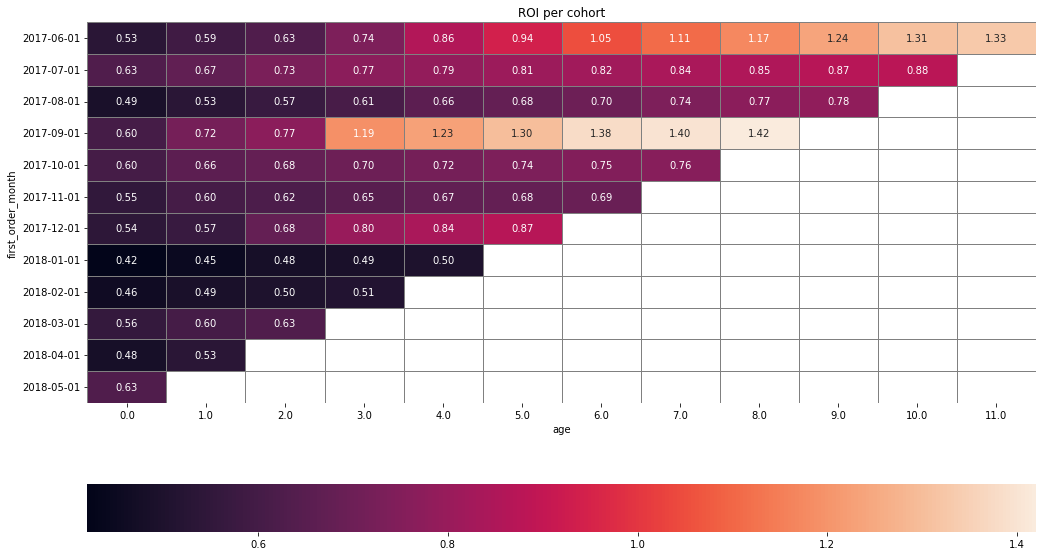

In [66]:
roi_piv.index=roi_piv.index.astype(str)
fig,ax=plt.subplots(figsize=(17,10))
sns.heatmap(roi_piv, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws= {'orientation': 'horizontal'} 
            ).set(title ='ROI per cohort')
plt.show()

Let's see if ROI per source will have a different picture

In [67]:
ltv_per_source=orders.groupby(['first_source'])['Uid','Revenue'].agg({'Uid':'nunique','Revenue':'sum'}).reset_index()
ltv_per_source.columns=['source_id','buyers','Revenue']
ltv_per_source['ltv']=ltv_per_source['Revenue']/ltv_per_source['buyers']
ltv_per_source


C:\Users\evyke\AppData\Local\Temp\ipykernel_22140\3631433899.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



source_id  buyers   Revenue        ltv
0          1    3371  33881.60  10.050905
1          2    3537  47535.24  13.439423
2          3   10153  51969.96   5.118680
3          4    9985  55276.20   5.535924
4          5    7121  53509.81   7.514367
5          7       1      1.22   1.220000
6          9    1056   5555.06   5.260473
7         10    1299   4328.11   3.331878

In [68]:
roi_per_source=costs_market_source.merge(ltv_per_source,on=['source_id'])
roi_per_source['cac']=roi_per_source['costs']/roi_per_source['buyers']
roi_per_source['romi']=roi_per_source['ltv']/roi_per_source['cac']
roi_per_source

source_id      costs  buyers   Revenue        ltv        cac      romi
0          1   20833.27    3371  33881.60  10.050905   6.180145  1.626322
1          2   42806.04    3537  47535.24  13.439423  12.102358  1.110480
2          3  141321.63   10153  51969.96   5.118680  13.919199  0.367742
3          4   61073.60    9985  55276.20   5.535924   6.116535  0.905075
4          5   51757.10    7121  53509.81   7.514367   7.268235  1.033864
5          9    5517.49    1056   5555.06   5.260473   5.224896  1.006809
6         10    5822.49    1299   4328.11   3.331878   4.482286  0.743343

In [69]:
fig = px.bar(roi_per_source, x='source_id', y='romi')
fig.update_xaxes(type='category')
fig.show()

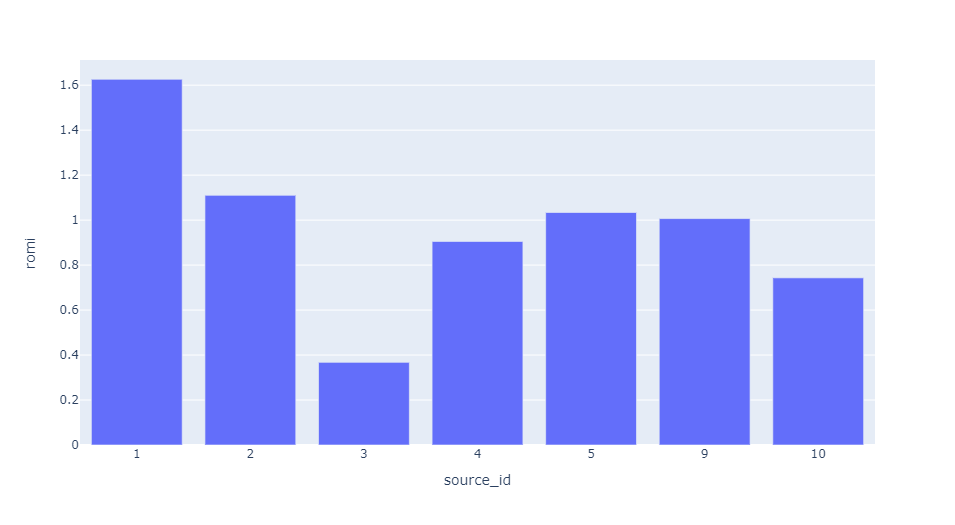

Sources 9 and 10 are consistently our lowest sources of revenue.   The remaining sources similarly fluctuate together throughout the year, peaking around the holidays.

# Conclusion
### Between December and March is when we have the most daily, weekly and monthly active users.  Daily active use peaks on weekends.
### On average people start buying 20.0 days after their first visit, and the overall conversion rate is 16.0%
### We should invest more in marketing for June and September. They are both very strong cohorts.  Perhaps it's because of school getting out and getting back in session. Let's look into this further.  
### The revenue from source 3 is in the middle of the pack, but its return on marketing investment is very low.   I suggest spending extra for the next couple of months to see how it affects source 3, if we can't make our ROMI break even, we should consider suspending investment in source 3 in the future.
### As the holidays approach, we should invest more in touch devices, and then during the holidays we should invest extra marketing on desktop machines.